In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weatherHistory.csv", parse_dates=True, index_col="Formatted Date")


In [3]:
df.sample(5)


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-08-28 19:00:00+02:00,Mostly Cloudy,rain,17.894444,17.894444,0.77,8.1305,260.0,11.2056,0.0,1008.91,Mostly cloudy until evening.
2011-08-25 20:00:00+02:00,Partly Cloudy,rain,28.027778,28.794444,0.53,4.5241,137.0,10.3523,0.0,1013.08,Partly cloudy starting in the morning continui...
2015-01-27 17:00:00+01:00,Overcast,snow,0.000000,0.000000,0.85,2.9302,51.0,7.1323,0.0,1016.72,Mostly cloudy throughout the day.
2015-07-06 09:00:00+02:00,Partly Cloudy,rain,29.955556,31.050000,0.50,1.7710,354.0,16.1000,0.0,1017.08,Partly cloudy starting in the morning.
2008-10-30 23:00:00+01:00,Partly Cloudy,rain,10.972222,10.972222,0.75,14.3129,191.0,15.8263,0.0,1009.68,Partly cloudy throughout the day and breezy st...


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Loud Cover                96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


In [5]:
df.isnull().sum()


Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
df.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [16]:
df["Daily Summary"].value_counts()


Mostly cloudy throughout the day.                                                                       20085
Partly cloudy throughout the day.                                                                        9981
Partly cloudy until night.                                                                               6169
Partly cloudy starting in the morning.                                                                   5184
Foggy in the morning.                                                                                    4201
                                                                                                        ...  
Breezy starting overnight continuing until morning and foggy overnight.                                    24
Mostly cloudy throughout the day and breezy starting overnight continuing until afternoon.                 24
Partly cloudy starting in the morning and breezy starting in the afternoon continuing until evening.       24
Rain until

In [22]:
df["Summary"].value_counts()


Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

<AxesSubplot:>

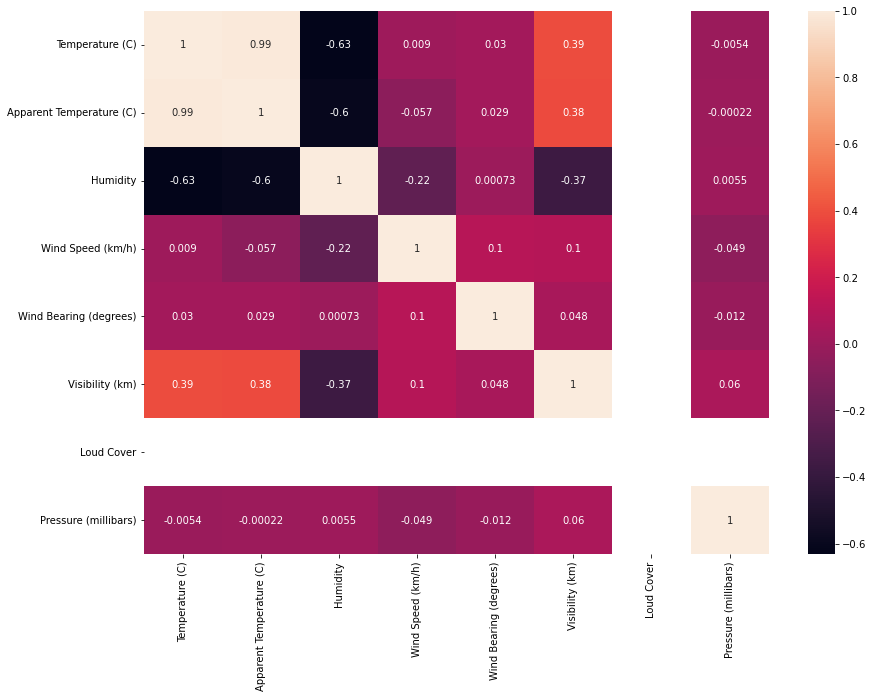

In [23]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(df.corr(), annot=True)


In [25]:
df["Precip Type"].value_counts()


rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [26]:
df["Summary"].unique()


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

Text(0.5, 1.0, 'Preciptype vs humidity')

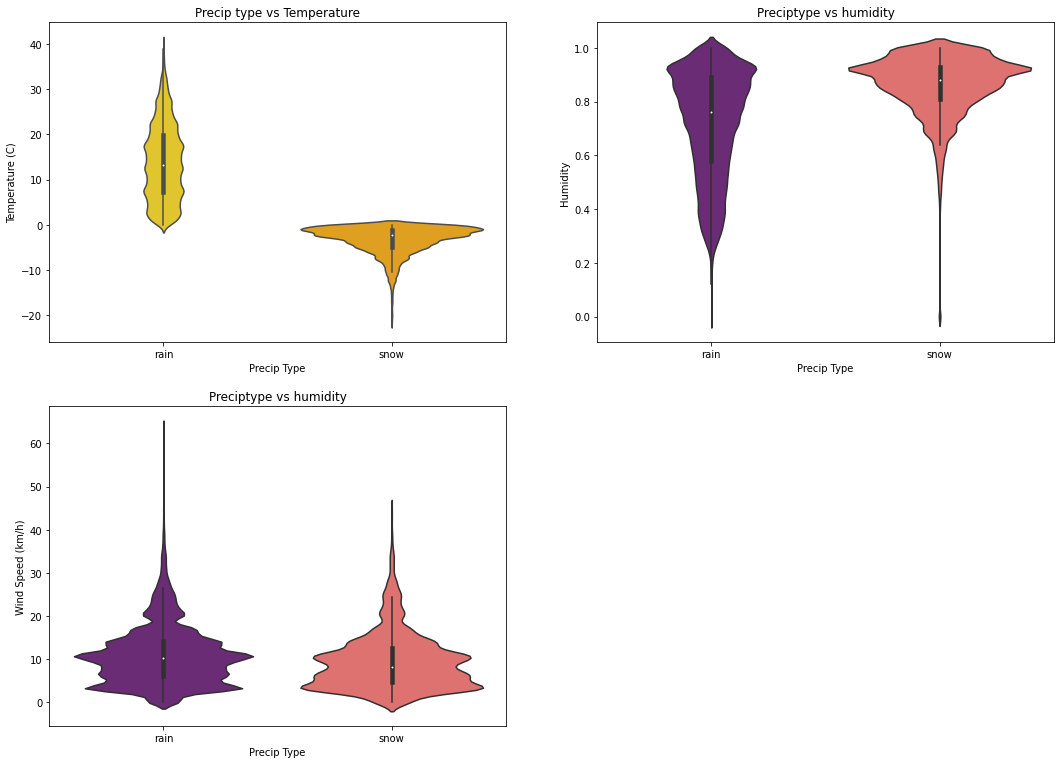

In [27]:
f = plt.figure(figsize=(18, 20))
ax = f.add_subplot(321)
sns.violinplot(x="Precip Type", y="Temperature (C)", data=df, palette="Wistia", ax=ax)
ax.set_title("Precip type vs Temperature")

ax = f.add_subplot(322)
sns.violinplot(x="Precip Type", y="Humidity", data=df, palette="magma", ax=ax)
ax.set_title("Preciptype vs humidity")

ax = f.add_subplot(323)
sns.violinplot(x="Precip Type", y="Wind Speed (km/h)", data=df, palette="magma", ax=ax)
ax.set_title("Preciptype vs humidity")


In [28]:
df.index.min()


datetime.datetime(2006, 1, 1, 0, 0, tzinfo=tzoffset(None, 3600))

In [29]:
df.index.max()


datetime.datetime(2016, 12, 31, 23, 0, tzinfo=tzoffset(None, 3600))

In [30]:
# y widocznosc
# drop loud
df.columns


Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [32]:
df.drop(columns=["Loud Cover", "Daily Summary"], inplace=True)


KeyError: "['Loud Cover', 'Daily Summary'] not found in axis"

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
dtypes: float64(7), object(2)
memory usage: 9.4+ MB


In [34]:
df["Precip Type"] = (
    df["Precip Type"].astype("category").cat.add_categories("lack").fillna("lack")
)

In [35]:
df["Precip Type"]


Formatted Date
2006-04-01 00:00:00+02:00    rain
2006-04-01 01:00:00+02:00    rain
2006-04-01 02:00:00+02:00    rain
2006-04-01 03:00:00+02:00    rain
2006-04-01 04:00:00+02:00    rain
                             ... 
2016-09-09 19:00:00+02:00    rain
2016-09-09 20:00:00+02:00    rain
2016-09-09 21:00:00+02:00    rain
2016-09-09 22:00:00+02:00    rain
2016-09-09 23:00:00+02:00    rain
Name: Precip Type, Length: 96453, dtype: category
Categories (3, object): ['rain', 'snow', 'lack']

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Summary                   96453 non-null  object  
 1   Precip Type               96453 non-null  category
 2   Temperature (C)           96453 non-null  float64 
 3   Apparent Temperature (C)  96453 non-null  float64 
 4   Humidity                  96453 non-null  float64 
 5   Wind Speed (km/h)         96453 non-null  float64 
 6   Wind Bearing (degrees)    96453 non-null  float64 
 7   Visibility (km)           96453 non-null  float64 
 8   Pressure (millibars)      96453 non-null  float64 
dtypes: category(1), float64(7), object(1)
memory usage: 8.7+ MB


In [37]:
df.drop(columns="Apparent Temperature (C)", inplace=True)


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Summary                 96453 non-null  object  
 1   Precip Type             96453 non-null  category
 2   Temperature (C)         96453 non-null  float64 
 3   Humidity                96453 non-null  float64 
 4   Wind Speed (km/h)       96453 non-null  float64 
 5   Wind Bearing (degrees)  96453 non-null  float64 
 6   Visibility (km)         96453 non-null  float64 
 7   Pressure (millibars)    96453 non-null  float64 
dtypes: category(1), float64(6), object(1)
memory usage: 8.0+ MB


In [39]:
df.shape


(96453, 8)

In [40]:
df["Summary"].unique()


array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [41]:
df["Summary"].nunique()


27

# Summary other values

In [42]:
other = df["Summary"].value_counts()[5:].index.to_list()
other


['Breezy and Overcast',
 'Breezy and Mostly Cloudy',
 'Breezy and Partly Cloudy',
 'Dry and Partly Cloudy',
 'Windy and Partly Cloudy',
 'Light Rain',
 'Breezy',
 'Windy and Overcast',
 'Humid and Mostly Cloudy',
 'Drizzle',
 'Breezy and Foggy',
 'Windy and Mostly Cloudy',
 'Dry',
 'Humid and Partly Cloudy',
 'Dry and Mostly Cloudy',
 'Rain',
 'Windy',
 'Humid and Overcast',
 'Windy and Foggy',
 'Windy and Dry',
 'Dangerously Windy and Partly Cloudy',
 'Breezy and Dry']

# Summary good, bad, average


In [43]:
"average"
"good"
"bad"

mapping = {
    "Partly Cloudy": "average",
    "Mostly Cloudy": "bad",
    "Overcast": "average",
    "Foggy": "bad",
    "Breezy and Mostly Cloudy": "bad",
    "Clear": "good",
    "Breezy and Partly Cloudy": "average",
    "Breezy and Overcast": "average",
    "Humid and Mostly Cloudy": "bad",
    "Humid and Partly Cloudy": "average",
    "Windy and Foggy": "bad",
    "Windy and Overcast": "bad",
    "Breezy and Foggy": "bad",
    "Windy and Partly Cloudy": "average",
    "Breezy": "good",
    "Dry and Partly Cloudy": "good",
    "Windy and Mostly Cloudy": "bad",
    "Dangerously Windy and Partly Cloudy": "bad",
    "Dry": "good",
    "Windy": "average",
    "Humid and Overcast": "average",
    "Light Rain": "bad",
    "Drizzle": "bad",
    "Windy and Dry": "average",
    "Dry and Mostly Cloudy": "average",
    "Breezy and Dry": "good",
    "Rain": "bad",
}


In [44]:
df.columns


Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

# Summary with 'other' value

In [77]:
df_other = df.replace(to_replace=other, value="other")

df_other.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Summary                 96453 non-null  object  
 1   Precip Type             96453 non-null  category
 2   Temperature (C)         96453 non-null  float64 
 3   Humidity                96453 non-null  float64 
 4   Wind Speed (km/h)       96453 non-null  float64 
 5   Wind Bearing (degrees)  96453 non-null  float64 
 6   Visibility (km)         96453 non-null  float64 
 7   Pressure (millibars)    96453 non-null  float64 
dtypes: category(1), float64(6), object(1)
memory usage: 8.0+ MB


In [76]:
df_other["Summary"].value_counts()


Partly Cloudy    31733
Mostly Cloudy    28094
Overcast         16597
Clear            10890
Foggy             7148
other             1991
Name: Summary, dtype: int64

In [81]:
df_other["Summary"] = df_other["Summary"].astype("category")
df_other.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96453 entries, 2006-04-01 00:00:00+02:00 to 2016-09-09 23:00:00+02:00
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Summary                 96453 non-null  category
 1   Precip Type             96453 non-null  category
 2   Temperature (C)         96453 non-null  float64 
 3   Humidity                96453 non-null  float64 
 4   Wind Speed (km/h)       96453 non-null  float64 
 5   Wind Bearing (degrees)  96453 non-null  float64 
 6   Visibility (km)         96453 non-null  float64 
 7   Pressure (millibars)    96453 non-null  float64 
dtypes: category(2), float64(6)
memory usage: 7.4+ MB


In [45]:
from sklearn.model_selection import train_test_split

X = df.drop("Visibility (km)", axis=1)
y = df["Visibility (km)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27
)

c:\Users\barto\anaconda3\envs\sda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


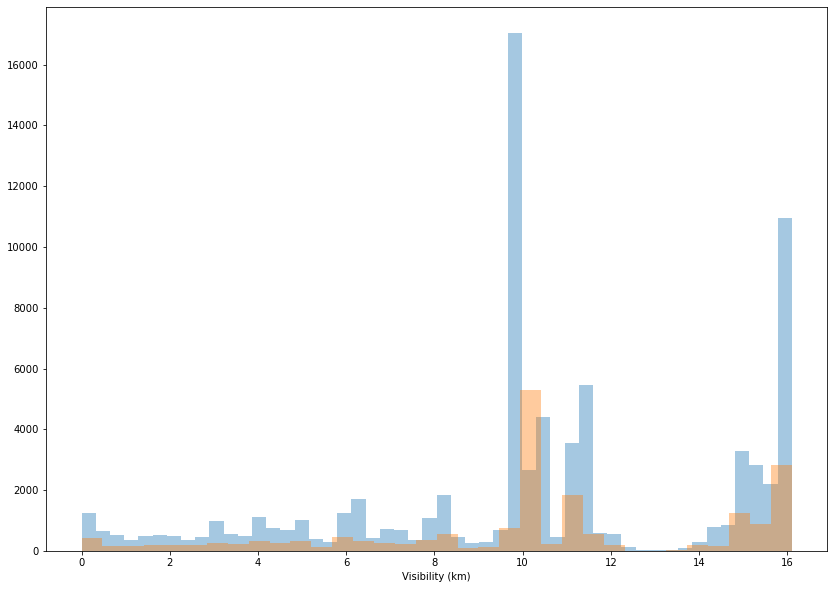

In [46]:
fig, ax = plt.subplots()
for a in [y_train, y_test]:
    sns.distplot(a, ax=ax, kde=False)

In [48]:
from scipy import stats

stats.kstest(y_train, y_test)

KstestResult(statistic=0.005662965388623764, pvalue=0.7031563370865719)

In [49]:
X_train.shape

(77162, 7)

In [50]:
X_test.shape

(19291, 7)

In [51]:
y_train.shape

(77162,)

In [52]:
y_test.shape

(19291,)

In [53]:
X_train.describe(include="all")


,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
count,77162,77162,77162.000000,77162.000000,77162.000000,77162.000000,77162.000000
unique,27,3,NaN,NaN,NaN,NaN,NaN
top,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN
freq,25468,68165,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.943316,0.734507,10.808340,187.378399,1003.265089
std,NaN,NaN,9.558804,0.195484,6.920303,107.409552,116.893629
min,NaN,NaN,-21.111111,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,4.750000,0.600000,5.828200,116.000000,1011.910000
50%,NaN,NaN,12.016667,0.780000,9.965900,180.000000,1016.440000
75%,NaN,NaN,18.838889,0.890000,14.119700,290.000000,1021.100000


# Summary as a category - good, average, bad

c:\Users\barto\anaconda3\envs\sda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


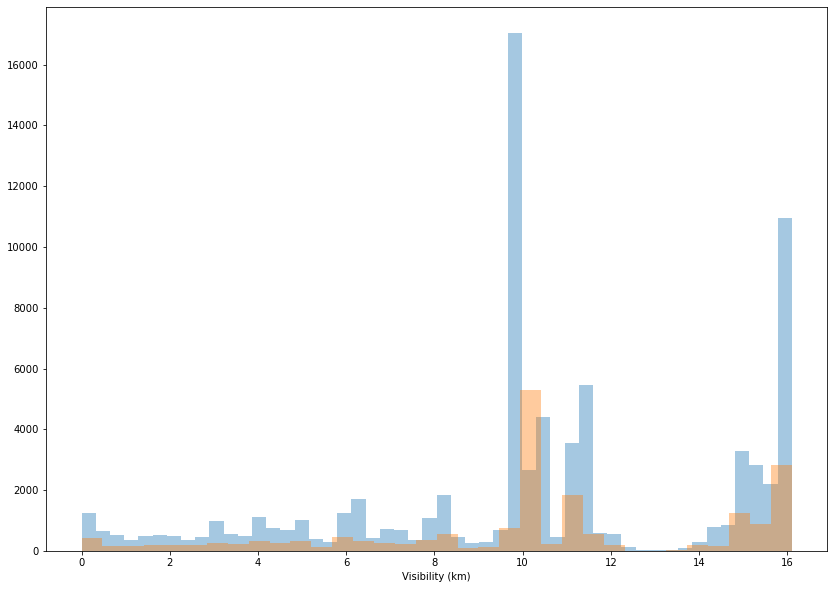

In [64]:
fig, ax = plt.subplots()
for a in [y_train_1, y_test_1]:
    sns.distplot(a, ax=ax, kde=False)


In [1]:
a = ["a", 4, 6]


a = ["a",
 4, 6]

In [ ]:
a = ["a", 4, 6]

In [ ]:
a = ["a", 4, 6]